# Cluster analysis
## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data inspection and data cleaning
#### 3.1. Basic data inspect
#### 3.2. Check null values and fix them
#### 3.3. Inspect relationships, distributions and outliers
### 4. Data processing
#### 4.1. Convert categorical variables to numerical representation
### 5. K-means clustering
#### 5.1. Define, fit, assign the cluster
#### 5.2. Evaluate
#### 5.3. Improve and update
##### 5.3.1. find the best amount of clusters(K)
##### 5.3.2. find the most important variables using PCA analysis
##### 5.3.3. combine variables
##### 5.3.4. combine variables + PCA
#### 5.4. Update and output
##### 5.4.1. Update k-means using the best method
##### 5.4.2. Table for BI dashbaord

## 1. Problem formulation and expected result
### Create customer segmentaions and build customer personas based on the customer data


## 2. Preparation
### 2.1.  Load packages and settings

In [56]:
#load packages
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, k_means

In [57]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [58]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [59]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2. Load data

In [60]:
raw_data = pd.read_csv('/Users/juli/Desktop/ML/Events Raw Data.csv')

## 3. Data inspection and data cleaning
### 3.1. Basic data inspect

In [61]:
#check the first 5 rows
raw_data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [62]:
#check the amount of rows and columns
raw_data.shape

(14783, 19)

In [63]:
# check the unique values in each column
for col in raw_data:
    print(col)
    print(raw_data[col].unique())
    print(len(raw_data[col].unique()))
    print('\n')

CUSTOMER
[    1     2     3 ... 16264 16266 16267]
14778


Age
['40-49' '60-64' '50-59' '65 or older' '33-39' '50-60' '50-61' '50-62'
 '50-63' '50-64' '26-32' '21-25' '17 or younger' '18-20']
14


Gender
['Female' 'Male']
2


Postcode
['AL9 7BN' 'AL7 1ZW' 'AB4 5JX' ... 'CM8 1FU' 'DD8 3JF' 'EH12 7PG']
14674


District
['Welwyn Hatfield' 'Aberdeenshire' 'Birmingham' 'Waltham Forest' 'Bolton'
 'Dartford' 'Bury' 'Aylesbury Vale' 'Colchester' 'Bassetlaw' 'Midlothian'
 'Carlisle' 'Angus' 'County Durham' 'Waverley' 'South Derbyshire'
 'Glasgow City' 'Enfield' 'Wealden' 'Merton'
 'Bournemouth, Christchurch and Poole' 'Renfrewshire' 'Hart' 'Allerdale'
 'North Lincolnshire' 'Dover' 'Falkirk' 'Maldon' 'Nuneaton and Bedworth'
 'Solihull' 'Chelmsford' 'Hackney' 'Newry, Mourne and Down' 'Gloucester'
 'Armagh City, Banbridge and Craigavon' 'Warwick' 'Croydon' 'Camden'
 'Folkestone and Hythe' 'Babergh' 'Herefordshire, County of' 'Belfast'
 'Aberdeen City' 'City of Edinburgh' 'Clackmannanshire'
 'Rhond

### 3.2. Check null values and fix them

In [64]:
#check null values
raw_data.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [65]:
# check the null value rows
raw_data[raw_data['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# all rows are almost whole-null-world, so they can be deleted
raw_data = raw_data.dropna(subset = ['Total_Household_Income'])

raw_data.isnull().sum()
# the rows with null data are that 5 rows

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

### 3.3. Inspect relationships, distributions and outliers

In [67]:
raw_data.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

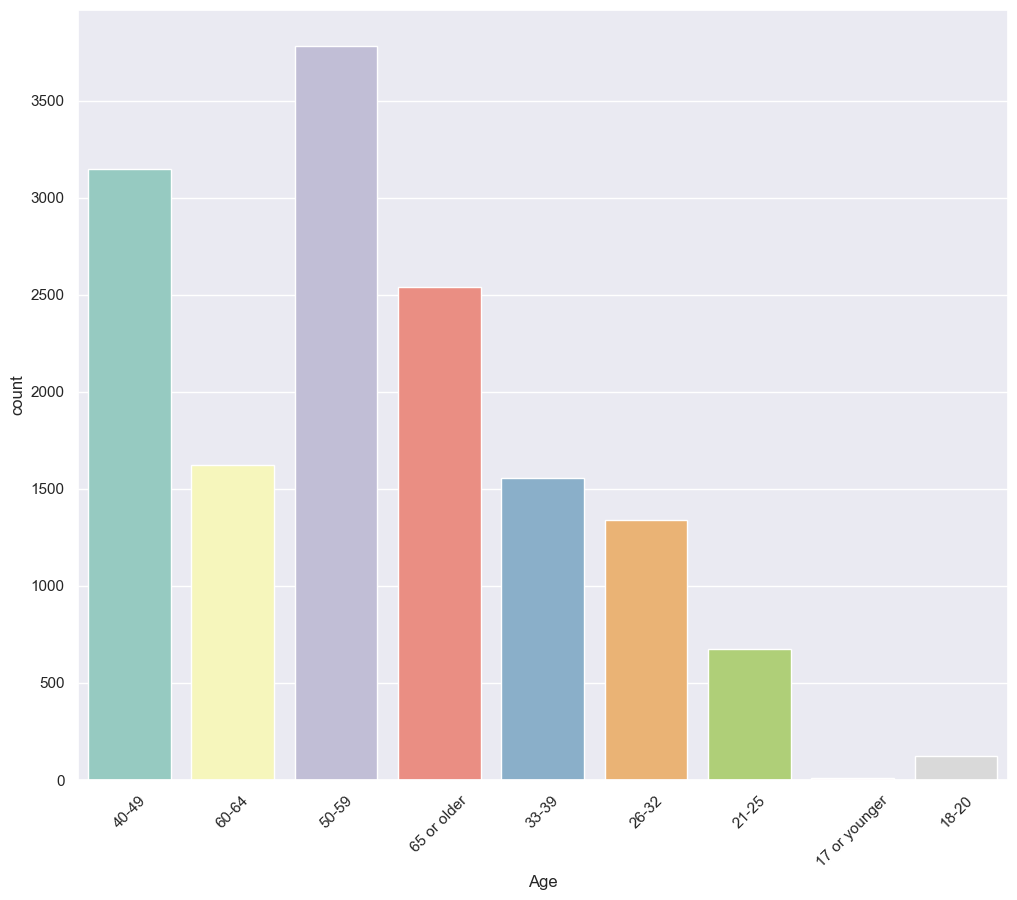

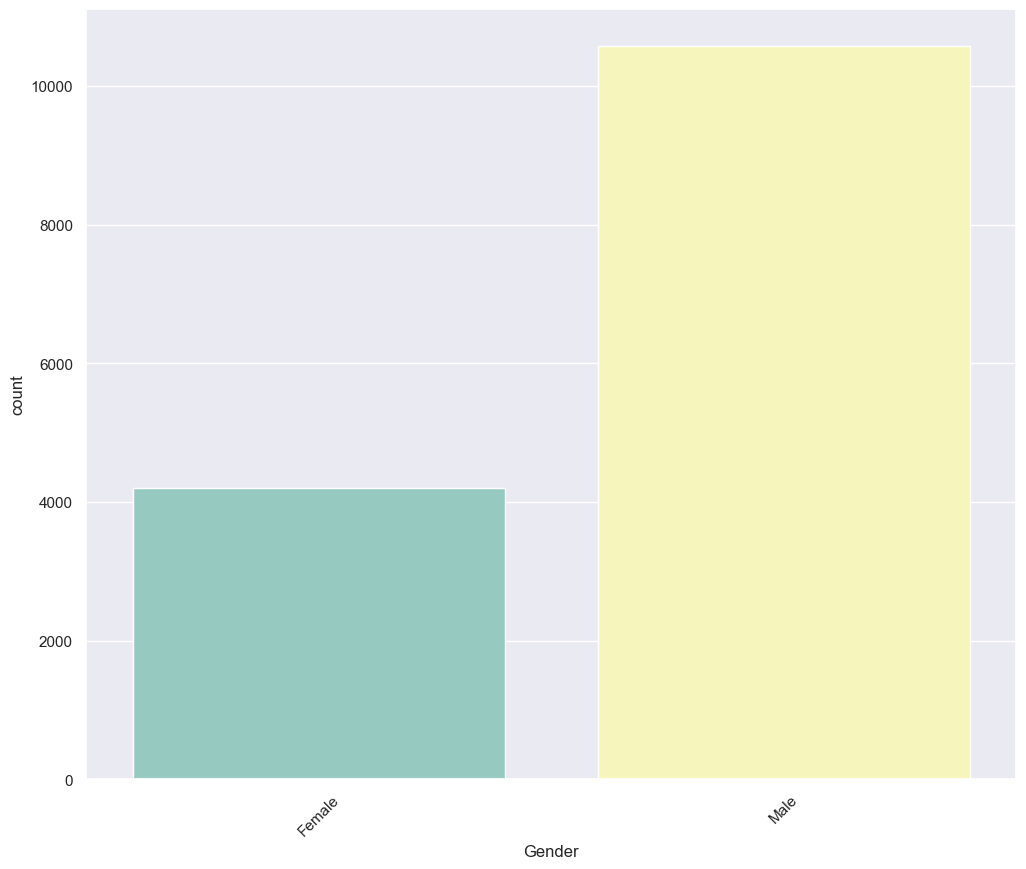

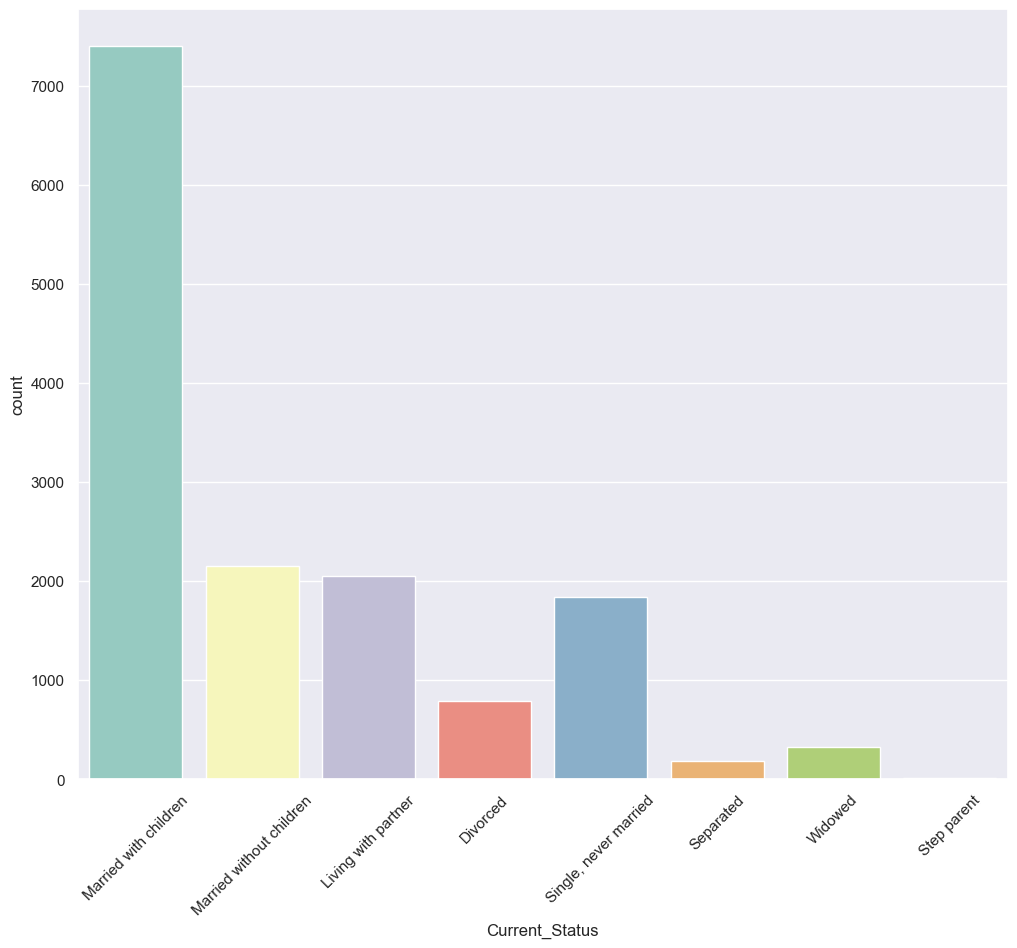

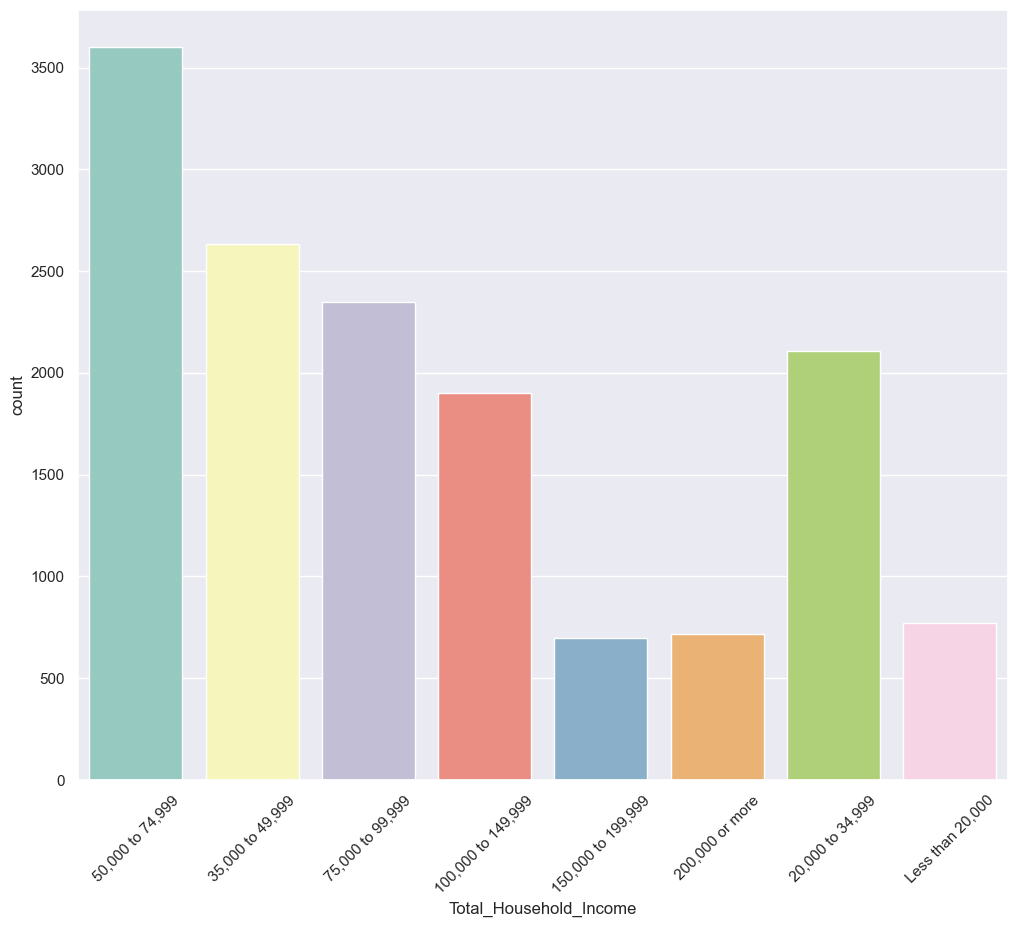

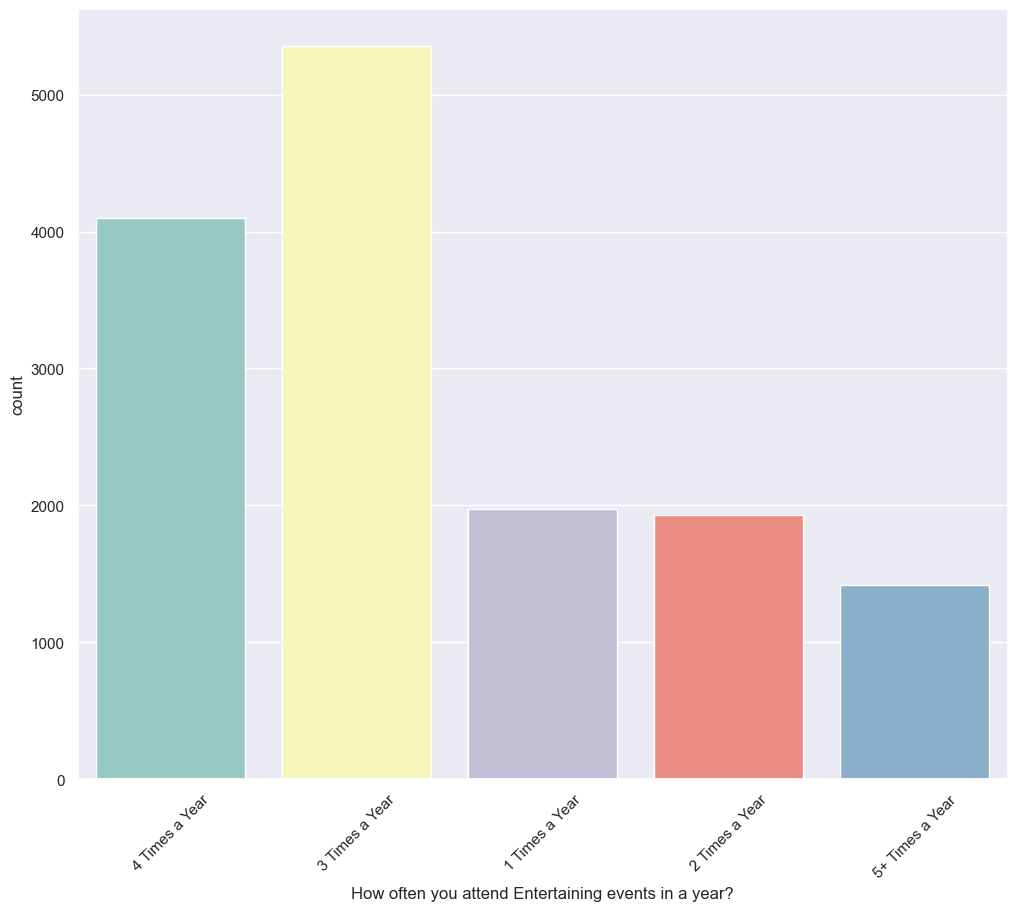

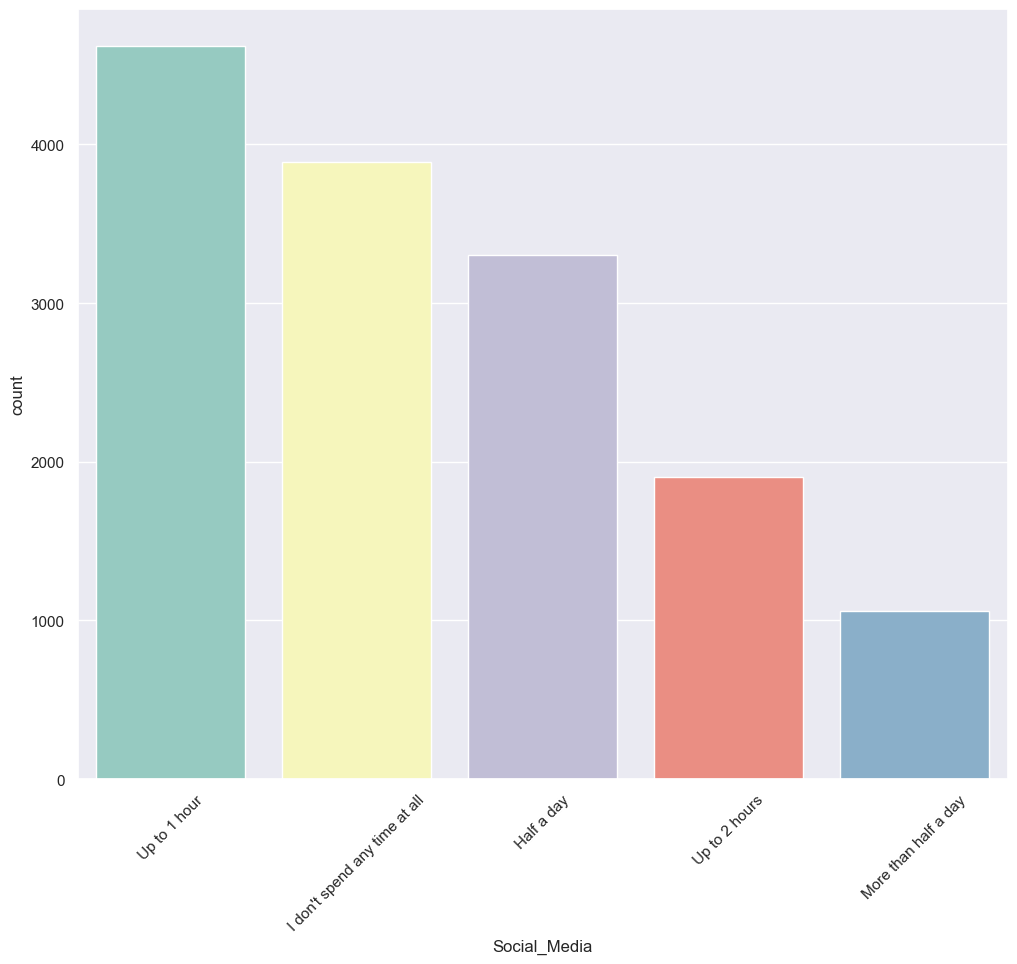

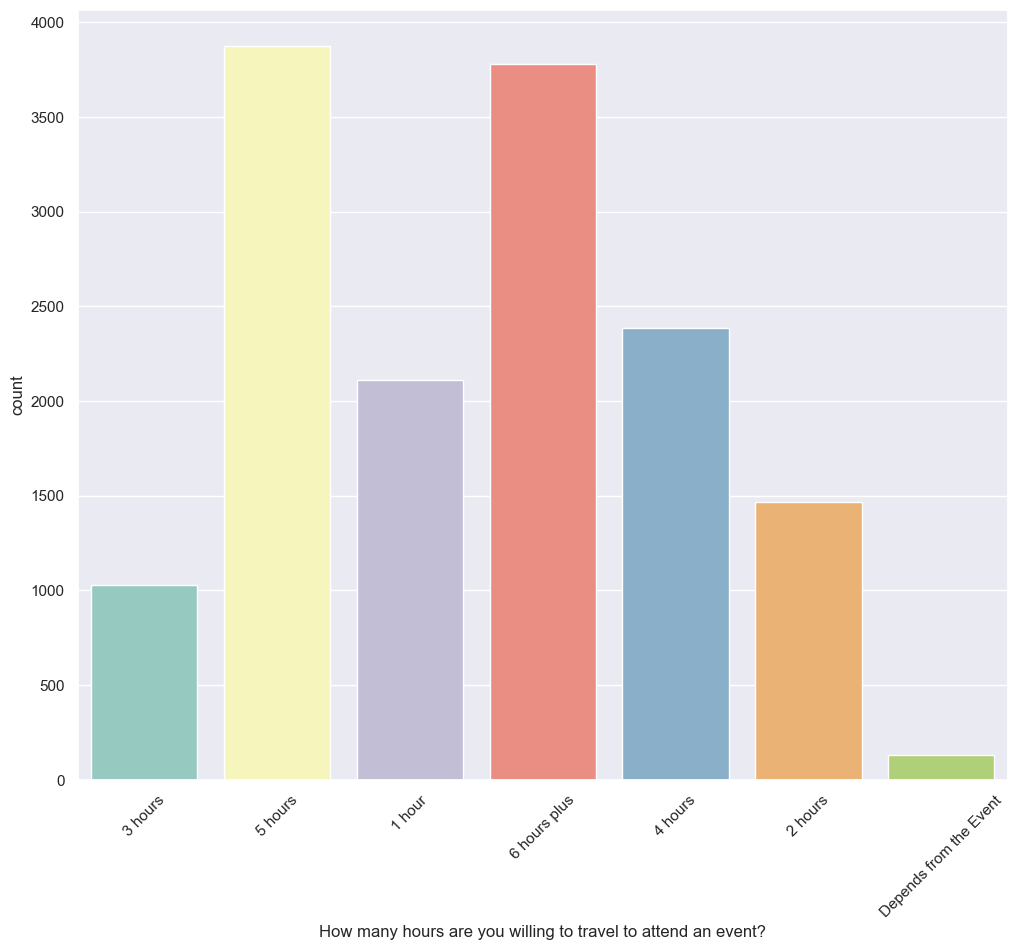

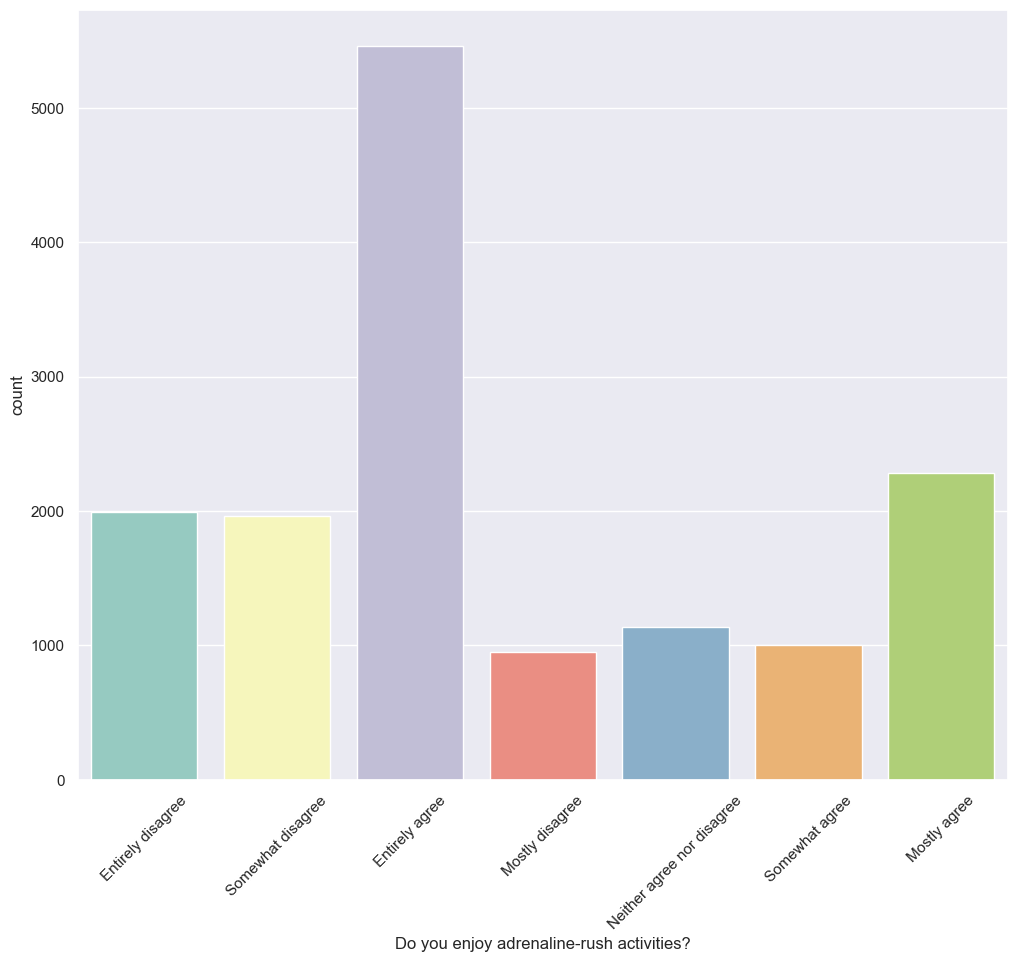

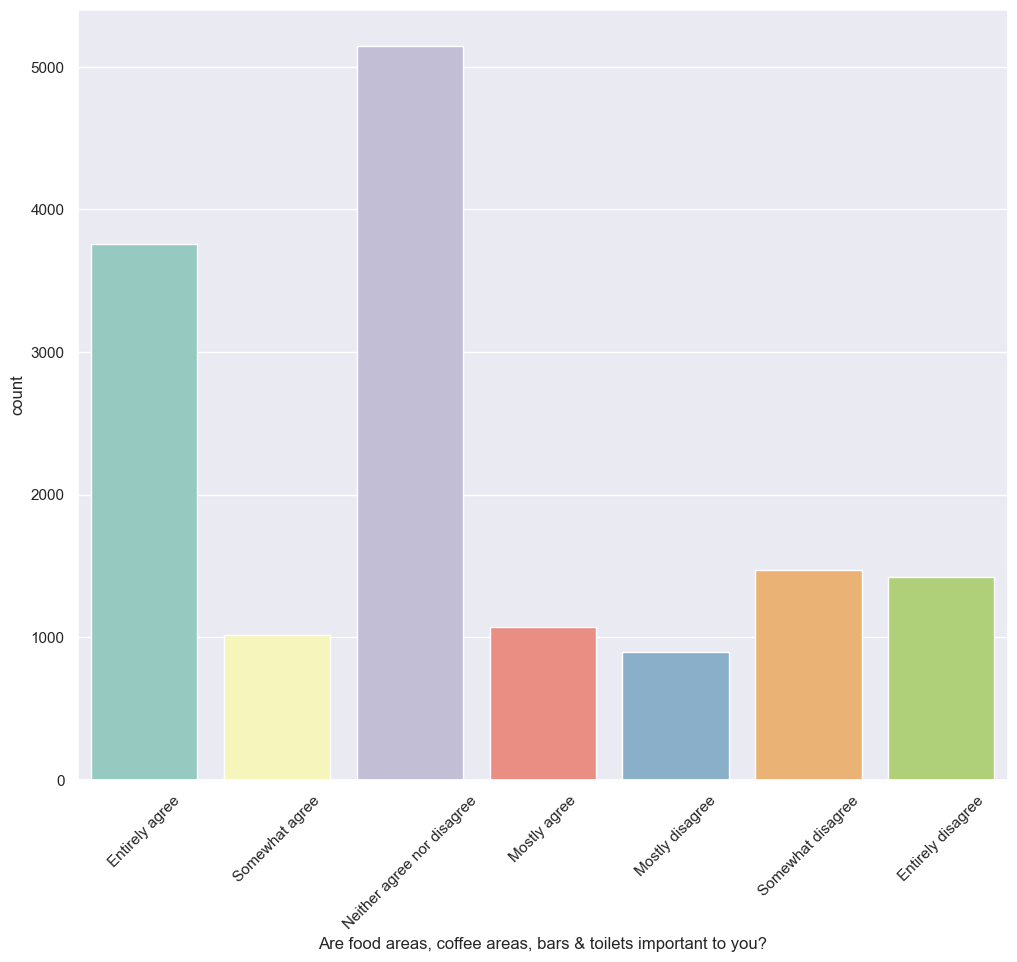

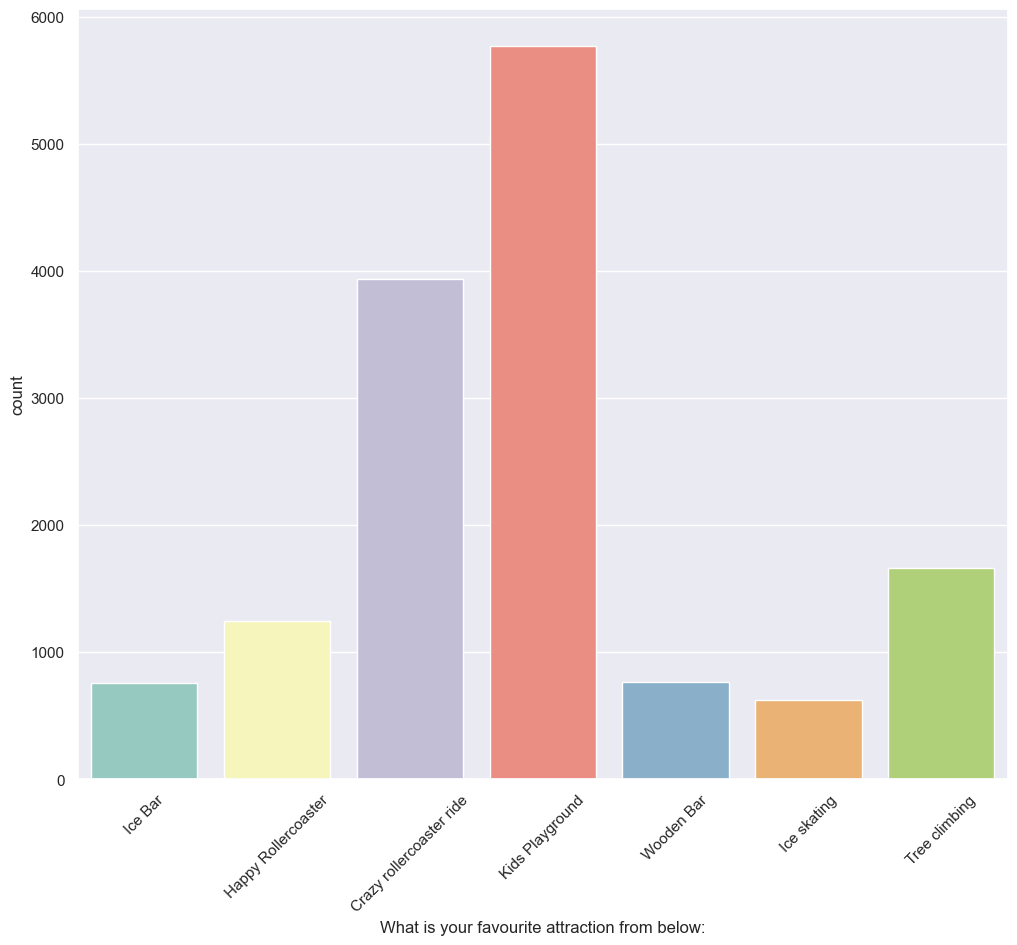

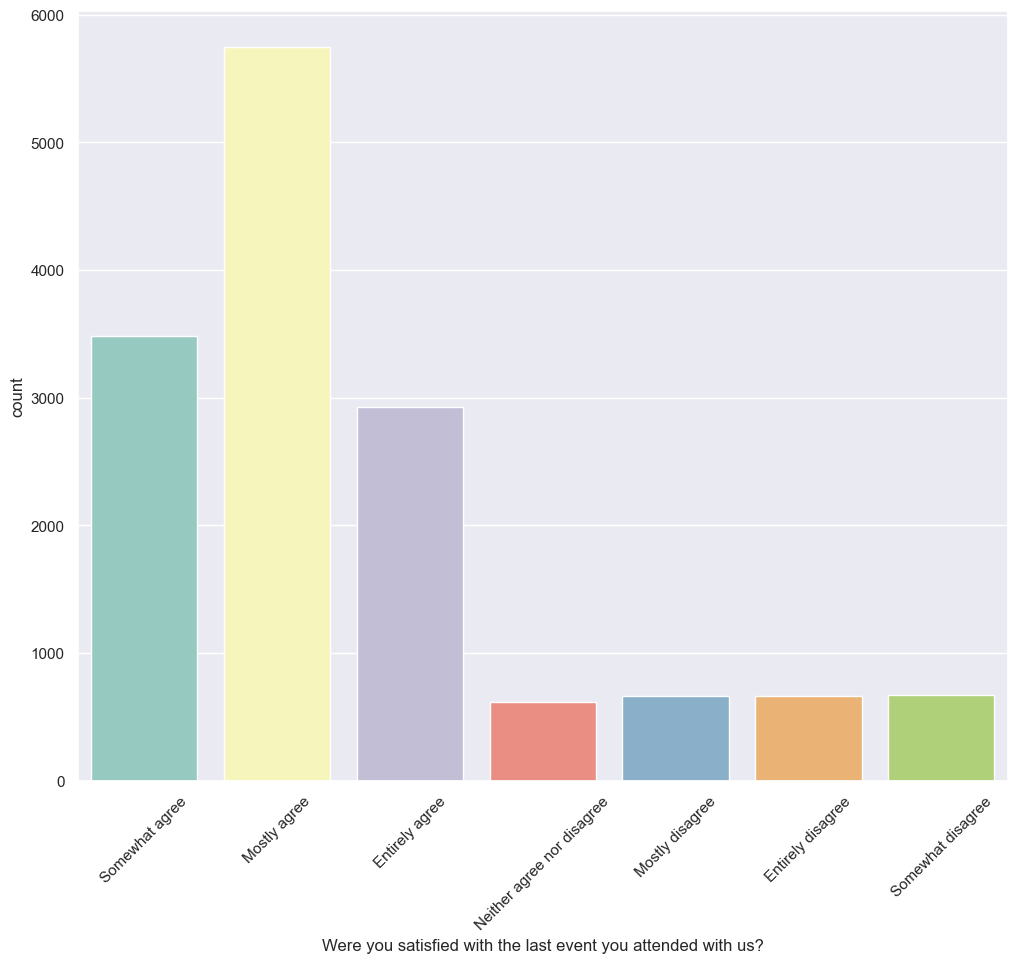

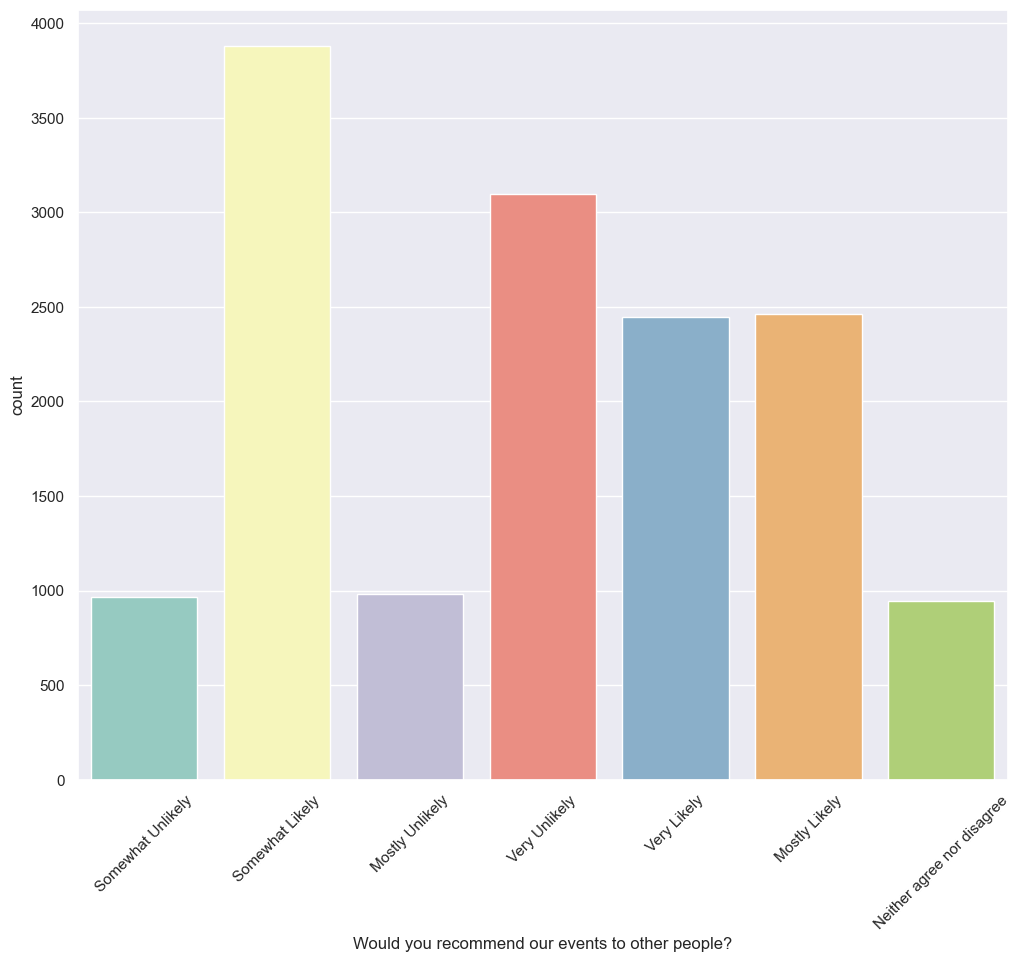

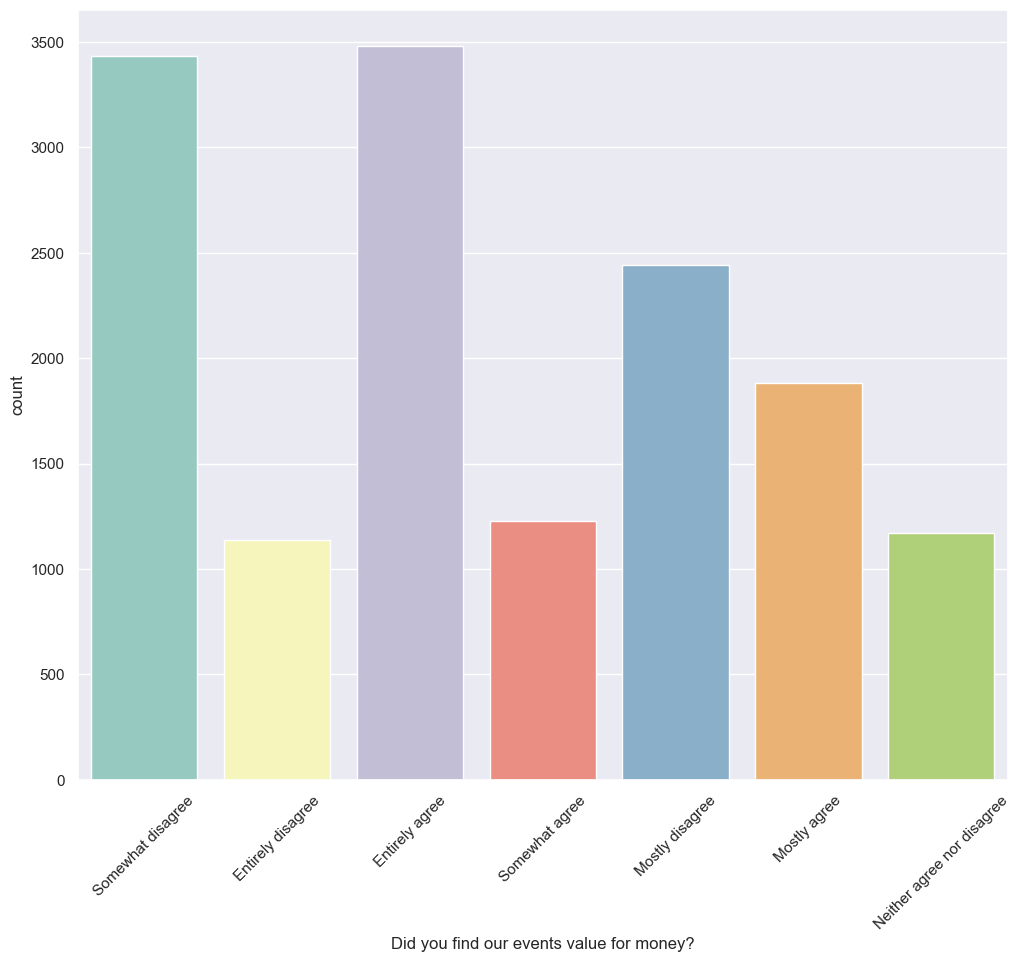

In [68]:
# loop through the variables and visualize their distributions
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

## 4. Data processing
### 4.1. Convert categorical variables to numerical representation

In [69]:
# keep only the columns that are needed
raw_data = raw_data[features]

new_raw_data = pd.get_dummies(raw_data, columns = features)

new_raw_data


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
14779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14780,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14781,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [70]:
# transform to array
X_train = new_raw_data.values

## 5. K-means clustering
### 5.1. Define, fit, assign the cluster

In [71]:
#define the model by starting with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=540)

#fit the model
kmeans = kmeans.fit(X_train)

#check out the assigned clusters for each customer(row)
print("The clusters are: ", kmeans.labels_)

The clusters are:  [0 4 4 ... 0 1 4]


### 5.2. Evaluate
##### check the Inertia, which represents the distances within each cluster (data points are near within the same cluster and clusters are far from other clusters), so it should be as low as possible

In [72]:
print("The Inertia is: ", kmeans.inertia_)

The Inertia is:  101900.26022685939


### 5.3. Improve 
#### 5.3.1. find the best amount of clusters(K)
##### the best amount of cluster provides the best inertia (low enough but not so low that there are too little data points in a cluster)

The innertia for : 2 Clusters is: 125619.02972065729
The innertia for : 3 Clusters is: 114905.386842667
The innertia for : 4 Clusters is: 106337.17594801629
The innertia for : 5 Clusters is: 100865.16529237546
The innertia for : 6 Clusters is: 96432.54661929767
The innertia for : 7 Clusters is: 93814.47396613643
The innertia for : 8 Clusters is: 91696.6459595668
The innertia for : 9 Clusters is: 89725.63941314064
The innertia for : 10 Clusters is: 88489.69860615287
The innertia for : 11 Clusters is: 87575.76613919965
The innertia for : 12 Clusters is: 86617.59038972601
The innertia for : 13 Clusters is: 86044.53555666041
The innertia for : 14 Clusters is: 85014.82069350652
The innertia for : 15 Clusters is: 84299.51971237123
The innertia for : 16 Clusters is: 83702.50345409382
The innertia for : 17 Clusters is: 82974.49452545872
The innertia for : 18 Clusters is: 82485.93512441615
The innertia for : 19 Clusters is: 81967.54262509283


Text(0.5, 1.0, 'Inertia Plot per k')

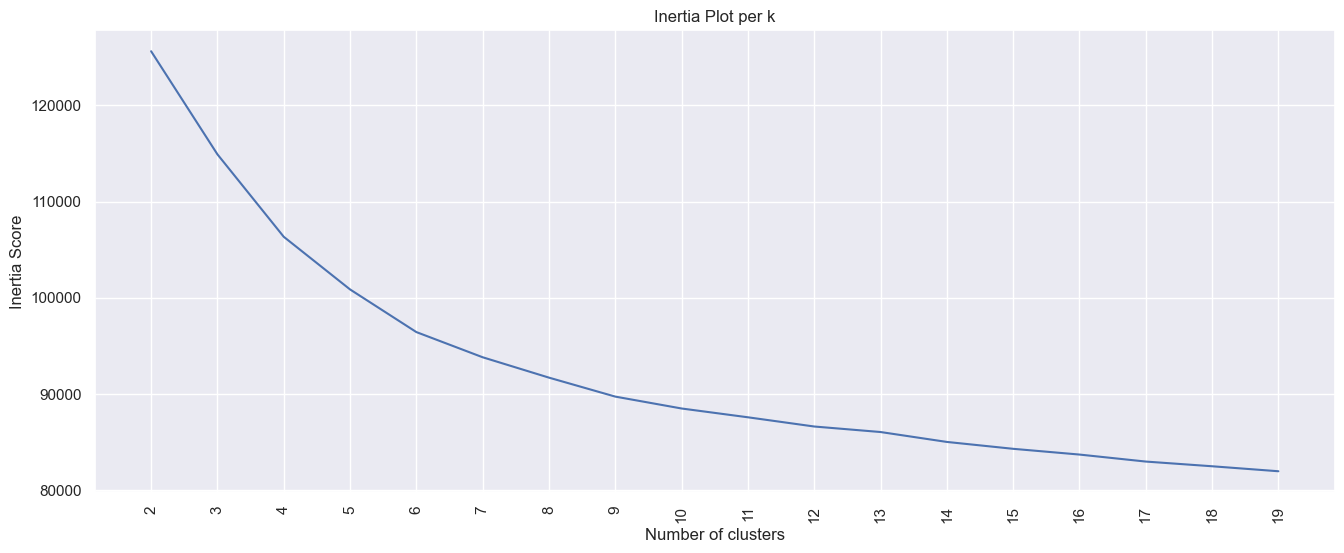

In [73]:
# loop through a list of K
no_of_clusters = range(2,20)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# plot (elbow method)
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

##### 5 is the best K

In [74]:
# update the model with 5 clusters
# define
kmeans = KMeans(n_clusters=5, random_state=2)
# fit
kmeans = kmeans.fit(X_train)
# assign clusters
predictions = kmeans.predict(X_train)
# check out cluster distribution
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])
countscldf



,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


#### 5.3.2. find the most important variables using PCA analysis
##### choose the variables that explain 95% of the variance of the data

Total Variance in our dataset is:  9.789277508428581
The 95% variance we want to have is:  9.299813633007151

Variance explain with 30 n_compononets:  7.80006328761735
Variance explain with 35 n_compononets:  8.200059944222128
Variance explain with 40 n_compononets:  8.559358189926293
Variance explain with 41 n_compononets:  8.625206072416159
Variance explain with 50 n_compononets:  9.157222065601204
Variance explain with 53 n_compononets:  9.301801997586805
Variance explain with 55 n_compononets:  9.391528190593444
Variance explain with 60 n_compononets:  9.592274980903577


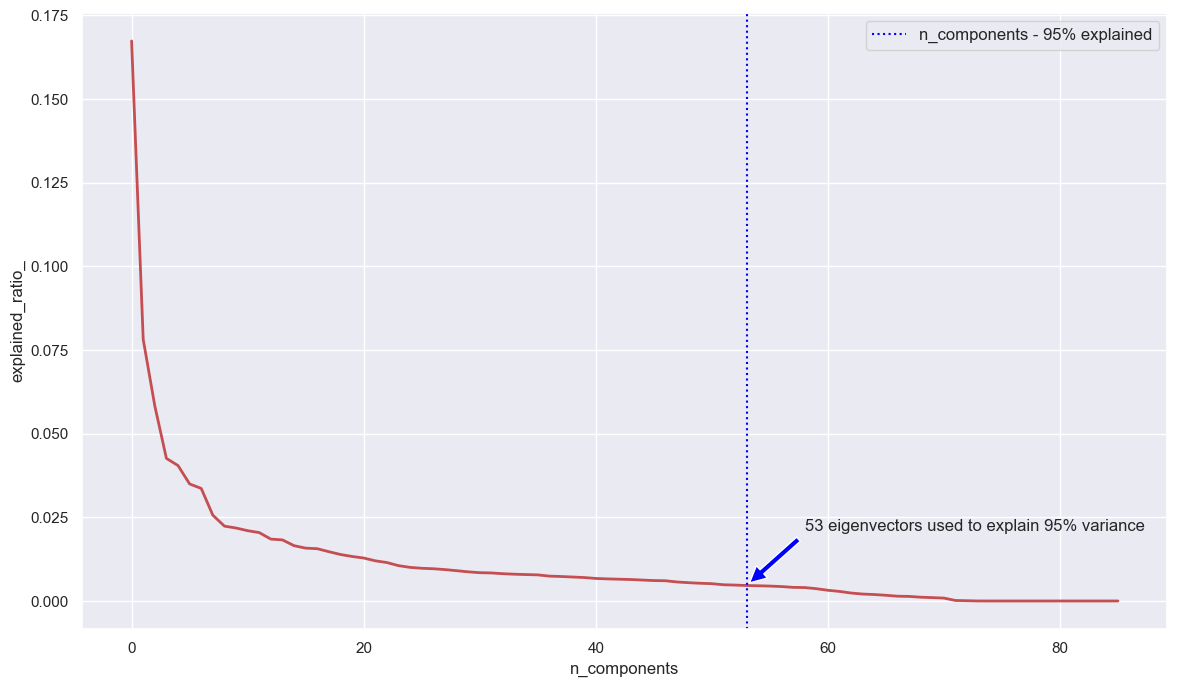

In [75]:
# run PCA with all components

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# calculate the 95% variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# create a dataframe with the components amount and variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# run through amount of components to see if it hits 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# plot
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()




The innertia for : 2 Clusters is: 118418.0053343995
The innertia for : 3 Clusters is: 107706.73804798856
The innertia for : 4 Clusters is: 99150.89658689551
The innertia for : 5 Clusters is: 94717.71454592943
The innertia for : 6 Clusters is: 89259.98846975304
The innertia for : 7 Clusters is: 87032.31815907743
The innertia for : 8 Clusters is: 84734.25265175509
The innertia for : 9 Clusters is: 82901.4338942602
The innertia for : 10 Clusters is: 81675.79302907929
The innertia for : 11 Clusters is: 80363.07116110733
The innertia for : 12 Clusters is: 79645.57849749771
The innertia for : 13 Clusters is: 78836.55417592355
The innertia for : 14 Clusters is: 77765.06416907415
The innertia for : 15 Clusters is: 77471.39025517245
The innertia for : 16 Clusters is: 76646.93730762883
The innertia for : 17 Clusters is: 75782.7240216464
The innertia for : 18 Clusters is: 75256.95483848409
The innertia for : 19 Clusters is: 74707.75842734546


Text(0.5, 1.0, 'Inertia Plot per k')

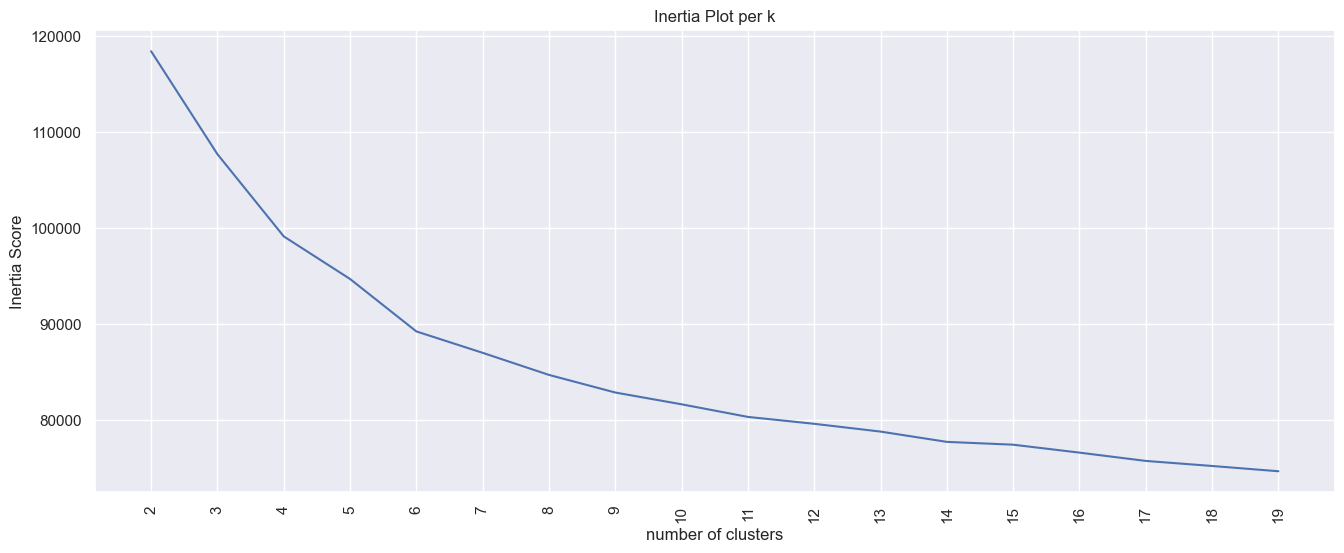

In [76]:
# run PCA and K-means again with 53 components
pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# plot
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

##### the Inertia becomes lower so the result is improved

#### 5.3.3. combine variables

In [77]:
# check out the exploratory data analysis to see if there are similiar groups of data and combine them to make all categories balanced

# "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
new_raw_data['How_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['How_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['How_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['How_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

# "social_media" column
# half a day + more than half a day
new_raw_data['Social_media_Half a day plus'] = 0
new_raw_data['Social_media_Half a day plus'][(new_raw_data['Social_Media_Half a day'] == 1) | (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

# "how_many_hours_are_you_willing_to_travel_to_attend_an_event" column
# 1 to 2 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

# "do_you_enjoy_adrenaline_rush_activities" column
# Mostly & Somewhat Agree
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat disagree'] == 1)] = 1

# "are_food_areas_coffee_areas_bars_toilets_important_to_you" column
# Mostly & Somewhat Agree
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree'] == 1)] = 1

# Mostly & Somewhat & entirely Disagree
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1


# "were_you_satisfied_with_the_last_event_you_attended_with_us" column
# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

# "would_you_recommend_our_events_to_other_people" column
# Mostly & Somewhat & Neither Unlikely
new_raw_data['Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

# "did_you_find_our_events_value_for_money" column
# Mostly & Somewhat agree
new_raw_data['Did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['Did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data['Did you find our events value for money?_Somewhat agree'] == 1) | (new_raw_data['Did you find our events value for money?_Mostly agree'] == 1)] = 1

# check out the rows and coulmns
print("The shape is: ", new_raw_data.shape)



The shape is:  (14778, 99)


/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/4071980894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['How_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/4071980894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['How_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How oft

In [78]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

In [54]:
# exclude the columns that are combined
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       'How_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
       'Social_Media_I dont spend any time at all',
       'Social_media_Half a day plus',
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'How_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
       'Do you enjoy adrenaline-rush activities?_Entirely agree',
       'Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'Do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'Do you enjoy adrenaline-rush activities?_Entirely disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'Are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
       'Were you satisfied with the last event you attended with us?_Entirely agree',
       'Were you satisfied with the last event you attended with us?_Mostly agree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       'Were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
       'Would you recommend our events to other people?_Very Likely',
       'Would you recommend our events to other people?_Mostly Likely',
       'Would you recommend our events to other people?_Somewhat Likely',
       'Would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'Would you recommend our events to other people?_Very Unlikely',
       'Did you find our events value for money?_Entirely agree',
       'Did_you_find_our_events_value_for_money Mostly & Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree',
       'Did you find our events value for money?_Mostly disagree',
       'Did you find our events value for money?_Entirely disagree',
       'Did you find our events value for money?_Neither agree nor disagree',  
]

The innertia for : 2 Clusters is: 116686.5553317454
The innertia for : 3 Clusters is: 104141.09642251834
The innertia for : 4 Clusters is: 96899.50478211055
The innertia for : 5 Clusters is: 91904.89062994113
The innertia for : 6 Clusters is: 89535.59712309824
The innertia for : 7 Clusters is: 87218.19974077921
The innertia for : 8 Clusters is: 85134.4808643952
The innertia for : 9 Clusters is: 83245.29287231111
The innertia for : 10 Clusters is: 82060.6002163463
The innertia for : 11 Clusters is: 80844.62408092536
The innertia for : 12 Clusters is: 79779.47137532211
The innertia for : 13 Clusters is: 78802.51808339538
The innertia for : 14 Clusters is: 78179.53400191097
The innertia for : 15 Clusters is: 77380.03471653064
The innertia for : 16 Clusters is: 76788.00224825431
The innertia for : 17 Clusters is: 76219.6928623529
The innertia for : 18 Clusters is: 75290.30813154033
The innertia for : 19 Clusters is: 74878.36766244675


Text(0.5, 1.0, 'Inertia Plot per k')

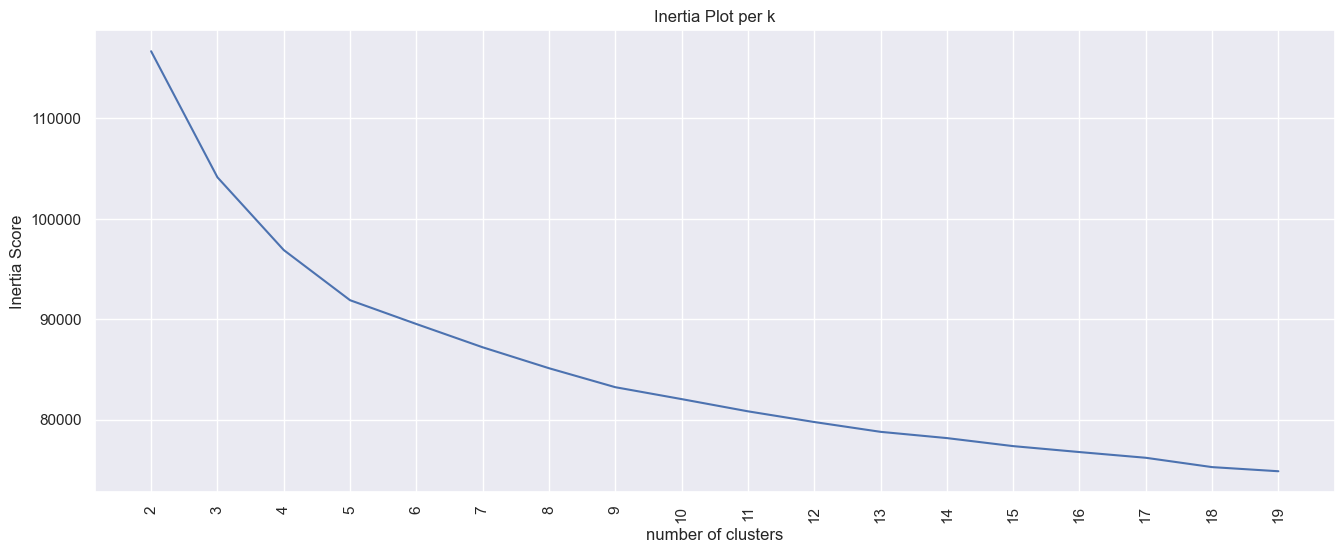

In [79]:
# run k-means with the new features
X_train = new_raw_data[new_features].values

no_of_clusters = range(2,20) 
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")


##### the Inertia becomes lower so the result is improved, even without PCA, and the elbow between 4-5 clusters looks more clear

#### 5.3.4. combine variables + PCA

Total Variance in our dataset is:  9.242069415373981
The 95% variance we want to have is:  8.779965944605282

Variance explain with 30 n_compononets:  8.083558619019152
Variance explain with 35 n_compononets:  8.4681474607523
Variance explain with 36 n_compononets:  8.536042989025743
Variance explain with 40 n_compononets:  8.774562779398025
Variance explain with 41 n_compononets:  8.826054856586683
Variance explain with 50 n_compononets:  9.179281219080028


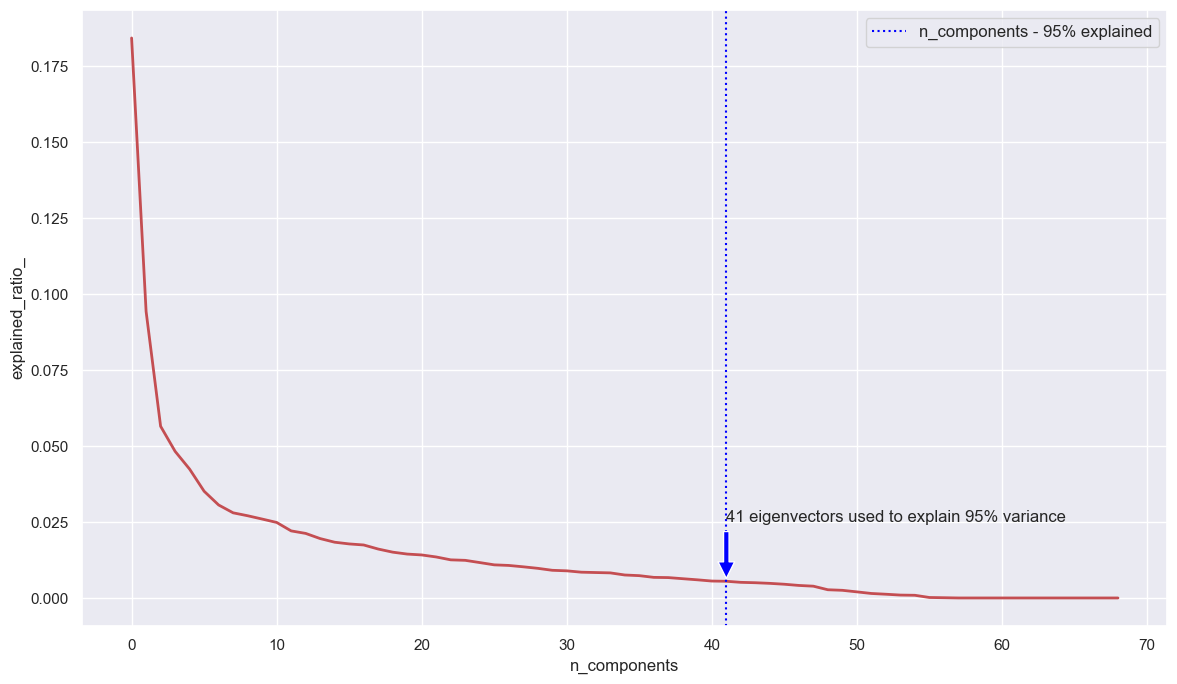

In [84]:
# check out k-means with new features + PCA

# find out the best n_component when it comes to new features
# run PCA with all components
X = new_raw_data[new_features].values
n_components = X.shape[1]
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# calculate the 95% variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# create a dataframe with the components amount and variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# run through amount of components to see if it hits 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))


# plot
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

plt.axvline(41,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

plt.annotate('41 eigenvectors used to explain 95% variance', xy=(41, pca.explained_variance_ratio_[41]), 
             xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 110324.58835369552
The innertia for : 3 Clusters is: 97998.61867517444
The innertia for : 4 Clusters is: 90763.0913048661
The innertia for : 5 Clusters is: 85771.60640331956
The innertia for : 6 Clusters is: 83422.95049069203
The innertia for : 7 Clusters is: 81151.36428574851
The innertia for : 8 Clusters is: 79305.130622222
The innertia for : 9 Clusters is: 77179.1824926206
The innertia for : 10 Clusters is: 75816.92037810717
The innertia for : 11 Clusters is: 74670.62552472926
The innertia for : 12 Clusters is: 73766.58371989572
The innertia for : 13 Clusters is: 73034.75449819186
The innertia for : 14 Clusters is: 72063.94561151693
The innertia for : 15 Clusters is: 71361.55850941341
The innertia for : 16 Clusters is: 70741.08272767879
The innertia for : 17 Clusters is: 70252.66582690232
The innertia for : 18 Clusters is: 69251.94006932643
The innertia for : 19 Clusters is: 68961.06496771271


Text(0.5, 1.0, 'Inertia Plot per k')

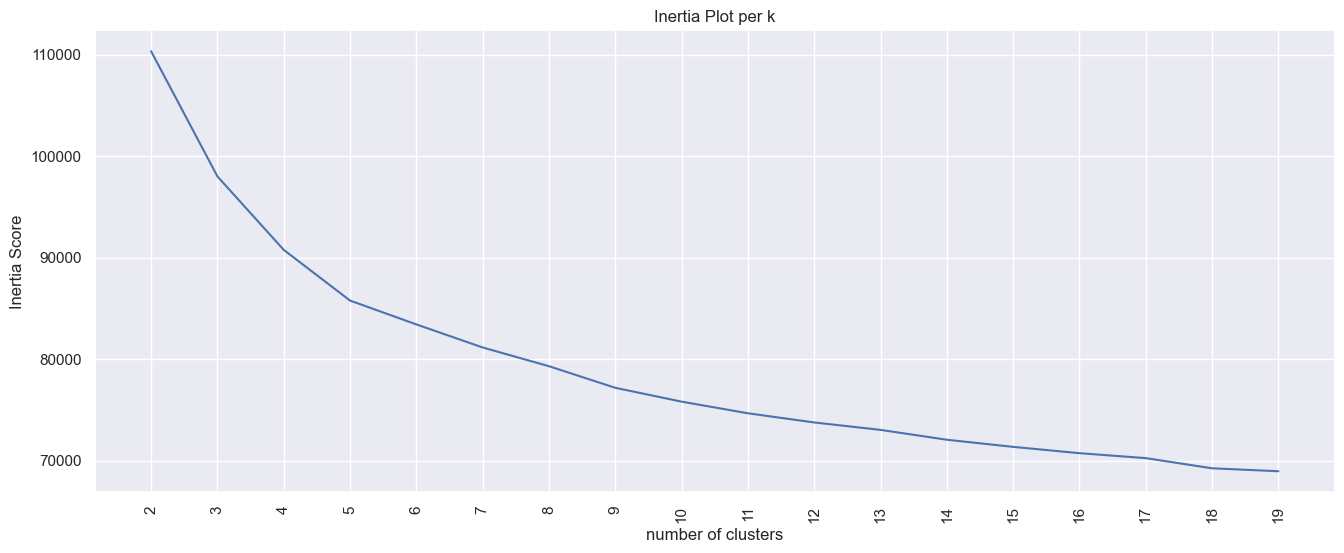

In [85]:
# run PCA and K-means again with 41 components
pca = PCA(n_components=41, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# plot
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

##### the Inertia becomes lower so the result is improved.

### 5.4. Update and output
##### 5.4.1 update k-means using the best method 
##### the best methods was 5 clusters with reduced columns and 41 as n_components

In [87]:
# data with reduced columns
X = new_raw_data[new_features].values

# run PCA
pca = PCA(n_components=41, random_state = 453)
X_r = pca.fit(X).transform(X)

# define
kmeans = KMeans(n_clusters=5, random_state=2)
# fit
kmeans = kmeans.fit(X_r)
# assign clusters
clusters = kmeans.labels_

##### 5.4.2. Table for BI dashbaord

In [88]:
# label the clusters in the table 
raw_data['Cluster'] = clusters
raw_data['Cluster_category'] = 'No Data'
raw_data['Cluster_category'][raw_data['Cluster']==0] = 'Cluster 1'
raw_data['Cluster_category'][raw_data['Cluster']==1] = 'Cluster 2'
raw_data['Cluster_category'][raw_data['Cluster']==2] = 'Cluster 3'
raw_data['Cluster_category'][raw_data['Cluster']==3] = 'Cluster 4'
raw_data['Cluster_category'][raw_data['Cluster']==4] = 'Cluster 5'

# check out the table
raw_data.head()

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/832951837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Cluster_category'][raw_data['Cluster']==0] = 'Cluster 1'
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/832951837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Cluster_category'][raw_data['Cluster']==1] = 'Cluster 2'
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/832951837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Cluster,Cluster_category
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,4,Cluster 5
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,2,Cluster 3
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,2,Cluster 3
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,3,Cluster 4
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,0,Cluster 1


In [91]:
# Replacing apostrophe from columns names
raw_data['Social_Media'] = raw_data['Social_Media'].str.replace("'","")

In [92]:
# order columns for categorical variables

# houshold income
raw_data['Household Income Order'] = 0
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='Less than 20,000'] = 1
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='20,000 to 34,999'] = 2
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='35,000 to 49,999'] = 3
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='50,000 to 74,999'] = 4
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='75,000 to 99,999'] = 5
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='100,000 to 149,999'] = 6
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='150,000 to 199,999'] = 7
raw_data['Household Income Order'][raw_data['Total_Household_Income']=='200,000 or more'] = 8

# social media
raw_data['Social_Media order'] = 0
raw_data['Social_Media order'][raw_data['Social_Media']=='I dont spend any time at all'] = 1
raw_data['Social_Media order'][raw_data['Social_Media']=='Up to 1 hour'] = 2
raw_data['Social_Media order'][raw_data['Social_Media']=='Up to 2 hours'] = 3
raw_data['Social_Media order'][raw_data['Social_Media']=='Half a day'] = 4
raw_data['Social_Media order'][raw_data['Social_Media']=='More than half a day'] = 5

# food and drink
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'] = 0
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Entirely agree'] = 1
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Mostly agree'] = 2
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Somewhat agree'] = 3
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Neither agree nor disagree'] = 4
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Somewhat disagree'] = 5
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Mostly disagree'] = 6
raw_data['Are food areas, coffee areas, bars & toilets important to you? order'][raw_data['Are food areas, coffee areas, bars & toilets important to you?']=='Entirely disagree'] = 7

# activities 
raw_data['Do you enjoy adrenaline-rush activities? order'] = 0
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Entirely agree'] = 1
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Mostly agree'] = 2
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Somewhat agree'] = 3
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Neither agree nor disagree'] = 4
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Somewhat disagree'] = 5
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Mostly disagree'] = 6
raw_data['Do you enjoy adrenaline-rush activities? order'][raw_data['Do you enjoy adrenaline-rush activities?']=='Entirely disagree'] = 7

# satisfaction
raw_data['Were you satisfied with the last event you attended with us? order'] = 0
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Entirely agree'] = 1
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Mostly agree'] = 2
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Somewhat agree'] = 3
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Neither agree nor disagree'] = 4
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Somewhat disagree'] = 5
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Mostly disagree'] = 6
raw_data['Were you satisfied with the last event you attended with us? order'][raw_data['Were you satisfied with the last event you attended with us?']=='Entirely disagree'] = 7

# value
raw_data['Did you find our events value for money? order'] = 0
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Entirely agree'] = 1
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Mostly agree'] = 2
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Somewhat agree'] = 3
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Neither agree nor disagree'] = 4
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Somewhat disagree'] = 5
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Mostly disagree'] = 6
raw_data['Did you find our events value for money? order'][raw_data['Did you find our events value for money?']=='Entirely disagree'] = 7

# recommendation
raw_data['Would you recommend our events to other people? order'] = 0
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Entirely agree'] = 1
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Mostly agree'] = 2
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Somewhat agree'] = 3
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Neither agree nor disagree'] = 4
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Somewhat disagree'] = 5
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Mostly disagree'] = 6
raw_data['Would you recommend our events to other people? order'][raw_data['Would you recommend our events to other people?']=='Entirely disagree'] = 7

# check out
raw_data.head()

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/2155499582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Household Income Order'][raw_data['Total_Household_Income']=='Less than 20,000'] = 1
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/2155499582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Household Income Order'][raw_data['Total_Household_Income']=='20,000 to 34,999'] = 2
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_44508/2155499582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,...,Did you find our events value for money?,Cluster,Cluster_category,Household Income Order,Social_Media order,"Are food areas, coffee areas, bars & toilets important to you? order",Do you enjoy adrenaline-rush activities? order,Were you satisfied with the last event you attended with us? order,Did you find our events value for money? order,Would you recommend our events to other people? order
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,...,Somewhat disagree,4,Cluster 5,4,2,1,7,3,5,0
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,...,Entirely disagree,2,Cluster 3,3,2,1,5,0,7,0
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I dont spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,...,Entirely disagree,2,Cluster 3,5,1,3,5,0,7,0
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,...,Somewhat disagree,3,Cluster 4,3,4,4,1,3,5,0
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,...,Entirely agree,0,Cluster 1,6,2,4,6,1,1,0


In [93]:
# export
raw_data.to_csv('events_cluster_output.csv', sep = "\t")

os.getcwd()

'/Users/juli/Desktop/ML'

##### tutored by Yiannis Pitsillides

### [Check out the BI Dashboard (Tableau) ->](https://lookerstudio.google.com/reporting/aed7a525-d7cc-4be5-8df8-a003e64f45b9)